In [1]:
excel_file_name = "20230105 - NC3 TDLs.xlsx"

In [2]:
# All necessary library and package imports

# tabular data manipulation ; I see it as excel on steroids
import pandas as pd

# main plotting library
import matplotlib.pyplot as plt

# numerical calculations
import numpy as np

# machine learning library
from sklearn import datasets

# Principal component analysis
from sklearn.decomposition import PCA

# systems library to manipulate folders/files
import sys, warnings

# For the interactive display
from IPython.display import display, Markdown, clear_output

# For the widgets in the interactive display
from ipywidgets import (
    interactive,
    Select,
    Dropdown,
    IntSlider,
    FloatRangeSlider,
    Button,
    VBox,
    HBox,
    Box,
    Tab,
    ToggleButton,
    BoundedIntText,
    Output,
    SelectionRangeSlider,
    Label,
    Text,
)

warnings.simplefilter('ignore')

# to have nice graphs with zoom function in the jupyter notebook
%matplotlib notebook

In [3]:
# for some reason needs to be run twice
%matplotlib notebook

In [4]:
# Add the scripts folder to the python PATH and import my scripts for plotting
sys.path.append("../scripts/")
sys.path.append(".")
from plotter import (
    scatter_plot_color,
    is_datetime,
    create_PCA_figure,
    add_intervals_parity_plot,
    f_save,
    create_widgets_interactive,
)
from reader import (
    read_pi_data_excel,
)
from processor import (
    filter_df_based_on_slider,
    pca_processor,
)

In [5]:
iris = datasets.load_iris()
df = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]],
    columns=iris["feature_names"] + ["target"],
)
converter = {0: "setosa", 1: "versicolor", 2: "virginica"}
df["target"] = df["target"].replace(converter)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# just to check if all columns are floats or datetime and no strings are left inside
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                object
dtype: object

In [7]:
(
    sliders,
    pca_checkboxes,
    xas_widget,
    yas_widget,
    color_widget,
    plot_button,
    plot_PCA_12_button,
    plot_PCA_23_button,
    save_button,
    figure_name,
    grid_button,
    add_interval_button,
    marker_size_input,
    figure_title,
    xlim_min_widget,
    xlim_max_widget,
    ylim_min_widget,
    ylim_max_widget,
    tab,
) = create_widgets_interactive(df)

In [8]:
def update_plot(
    df,
    sliders,
    xas_widget,
    yas_widget,
    color_widget,
    grid_button,
    marker_size_input,
    add_interval_button,
    figure_title,
    xlim_min_widget,
    xlim_max_widget,
    ylim_min_widget,
    ylim_max_widget,
):
    global f
    df_copy = df.copy()
    
    # Apply the filter from the sliders
    df_copy = filter_df_based_on_slider(df_copy, sliders)
        
    f, ax = plt.subplots()
    plt.ion()
    xas = xas_widget.value
    yas = yas_widget.value
    coloring = color_widget.value
    grid = grid_button.value
    markersize = marker_size_input.value
    add_intervals = add_interval_button.value 
    
    scatter_plot_color(
        f,
        ax,
        df_copy,
        xas,
        yas,
        coloring,
        markersize,
    )
    
    if df[xas].dtype == "float": 
        ax.set(
            xlim=(xlim_min_widget.value, xlim_max_widget.value),    
        )
    
    if df[yas].dtype == "float": 
        ax.set(
            ylim=(ylim_min_widget.value, ylim_max_widget.value),
        )
        
    if figure_title.value != "figure_title":
        ax.set(
            title=figure_title.value,
        )
    
    if add_intervals:
        add_intervals_parity_plot(ax)
    
    ax.grid(grid)

    f.tight_layout()
    
    return f

In [9]:
def create_PCA_plot(
    df,
    sliders,
    pca_checkboxes,
    color_widget,
    grid_button,
    marker_size_input,
    figure_title,
    xlim_min_widget,
    xlim_max_widget,
    ylim_min_widget,
    ylim_max_widget,
    pca_12,
):
    global f
    df_copy = df.copy()
    
    # Apply the filter from the sliders
    df_copy = filter_df_based_on_slider(df_copy, sliders)
    
    # Perform Principal Component Analysis on the DataFrame with
    # selected columns from the original DataFrame
    pca_cols = []
    for pca_checkbox in pca_checkboxes:
        if pca_checkboxes[pca_checkbox].value:
            pca_cols.append(pca_checkbox)
    df_copy_pca = df_copy[pca_cols]
    
    pca_object, pca_results, df_and_pca = pca_processor(
        df_from_which_pca=df_copy_pca,
        df_to_add_pca=df_copy,
    )
    
    f, ax = plt.subplots()
    plt.ion()
    coloring = color_widget.value
    grid = grid_button.value
    markersize = marker_size_input.value
    add_intervals = add_interval_button.value 

    if pca_12:
        pcs = [1, 2]
    else:
        pcs= [2, 3]
    
    create_PCA_figure(
        f,
        ax,
        pca_object,
        df_and_pca,
        coloring,
        markersize=markersize,
        pcs=pcs,
    )
    
#     # adjust the boundaries
#     ax.set(
#         xlim=(xlim_min_widget.value, xlim_max_widget.value),    
#     )
#     ax.set(
#         ylim=(ylim_min_widget.value, ylim_max_widget.value),
#     )
        
    if figure_title.value != "figure_title":
        ax.set(
            title=figure_title.value,
        )

    ax.grid(grid)

    f.tight_layout()
    
    return f

<IPython.core.display.Javascript object>


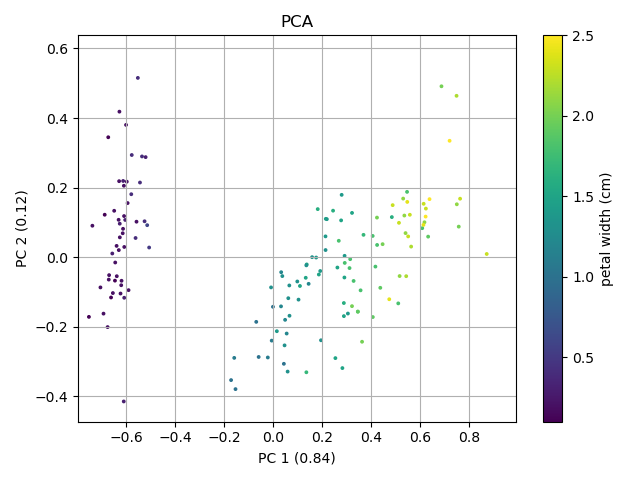

Explained variance (%):

0    84.136038
1    11.751808
2     3.473561
3     0.638592
dtype: float64
Index(['PC 1 (84.14%)'], dtype='object')
Index(['PC 2 (11.75%)'], dtype='object')
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'PC 1 (84.14%)', 'PC 2 (11.75%)',
       'PC 3 (3.47%)', 'PC 4 (0.64%)'],
      dtype='object')


In [10]:
taskbar = VBox(children=[
    tab,
    HBox(children=[plot_button, figure_title,]),
    HBox(children=[save_button, figure_name]),
])

@plot_button.on_click
def plot_on_click(b):
    clear_output()
    display(taskbar)
    update_plot(  
        df,
        sliders,
        xas_widget,
        yas_widget,
        color_widget,
        grid_button,
        marker_size_input,
        add_interval_button,
        figure_title,
        xlim_min_widget,
        xlim_max_widget,
        ylim_min_widget,
        ylim_max_widget,
    )
    
@plot_PCA_12_button.on_click
def plot_PCA12_on_click(b):
    clear_output()
    display(taskbar)
    pca_12 = True
    create_PCA_plot(
        df,
        sliders,
        pca_checkboxes,
        color_widget,
        grid_button,
        marker_size_input,
        figure_title,
        xlim_min_widget,
        xlim_max_widget,
        ylim_min_widget,
        ylim_max_widget,
        pca_12,
    )

@plot_PCA_23_button.on_click
def plot_PCA23_on_click(b):
    clear_output()
    display(taskbar)
    pca_12 = False
    create_PCA_plot(
        df,
        sliders,
        pca_checkboxes,
        color_widget,
        grid_button,
        marker_size_input,
        figure_title,
        xlim_min_widget,
        xlim_max_widget,
        ylim_min_widget,
        ylim_max_widget,
        pca_12,
    )
    
@save_button.on_click
def save_fig(b):
    global f
    f_name = figure_name.value
    f_save(f, f_name)
    
display(taskbar)